In [17]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [18]:
# Load the Boston Housing dataset

# boston = datasets.load_boston()
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data
y = boston.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=boston.feature_names)
df['MEDV'] = y  # 'MEDV' is the median value of owner-occupied homes in $1000s

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'], test_size=0.2, random_state=42)

# Display the first few rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [19]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to numpy arrays
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]  # Add bias term
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]
y_train = y_train.values
y_test = y_test.values

In [20]:
# Initialize parameters
def initialize_parameters(n_features):
    return np.zeros(n_features)

In [21]:
# Cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [22]:
# Gradient descent
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        # Calculate gradient
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        # Update theta
        theta -= alpha * gradients
        # Compute and save the cost
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Print cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}")

    return theta, cost_history

In [23]:
# Initialize
theta = initialize_parameters(X_train_scaled.shape[1])

# Hyperparameters
alpha = 0.01  # Learning rate
num_iters = 1000  # Number of iterations

# Train the model
theta, cost_history = gradient_descent(X_train_scaled, y_train, theta, alpha, num_iters)

Iteration 0, Cost: 295.9003
Iteration 100, Cost: 47.3601
Iteration 200, Cost: 16.2971
Iteration 300, Cost: 12.0015
Iteration 400, Cost: 11.3175
Iteration 500, Cost: 11.1494
Iteration 600, Cost: 11.0716
Iteration 700, Cost: 11.0200
Iteration 800, Cost: 10.9818
Iteration 900, Cost: 10.9527


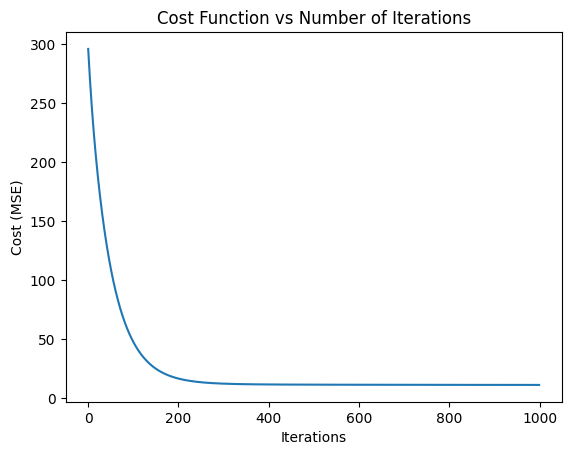

In [24]:
# Plot the cost function vs number of iterations
plt.plot(range(num_iters), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost Function vs Number of Iterations")
plt.show()

In [25]:
# Evaluate the model
y_pred = X_test_scaled.dot(theta)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f"Final MSE on Test Data: {mse:.4f}")

Final MSE on Test Data: 25.3497


In [27]:
# Now, calculate MSE after handling NaNs
mse = mean_squared_error(y_test, y_pred)
print(f"Gradient Descent MSE: {mse:.4f}")


Gradient Descent MSE: 25.3497


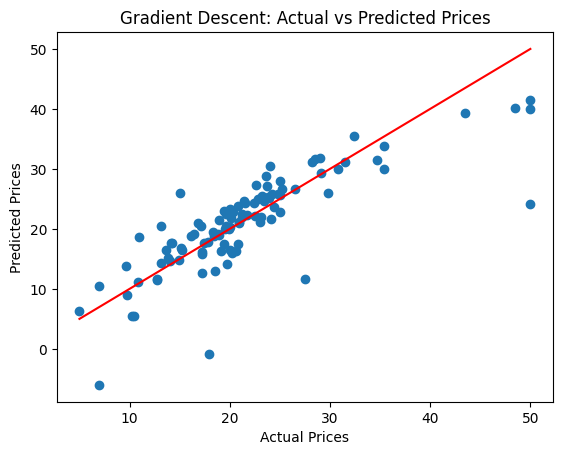

In [28]:
# Plot Actual vs Predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Gradient Descent: Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()